# Exercise 2: Bisector method
Data: The Hinode/SP records the full Stokes vector from the Fe I line pair around 6301.5 and 6302.5 Å. The observations covered the spectral range from 6300.89 to 6303.26 Å, with a sampling of 21.5 mÅ per pixel.

Aim: Estimation of velocity using bisector of intensity profiles

In [15]:
#import basic libraries 
import numpy as np
import matplotlib.pyplot as pl
from scipy.io import readsav as readsav
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.interpolate import interp1d
%matplotlib notebook

In [16]:
clight=2.99792458e8 #m /s
def gauss(x,a,x0,sigma):
    return 1-a*exp(-(x-x0)**2/(2*sigma**2))

In [17]:
#Read the data file, written in IDL-sav
#data has been reconstructed from the observed fits files
data = readsav('sp_20111027.sav')
print(data.keys())

dict_keys(['imagei', 'imageq', 'imageu', 'imagev'])


In [18]:
#combining all maps in one 4D-array
si = data['imagei']
sq = data['imageq']
su = data['imageu']
sv = data['imagev']
print(si.shape)
maps = np.array([si,sq,su,sv])

(112, 384, 383)


In [19]:
#check the shape of the array
#print(maps.shape)
stk,lmb, nx,ny= maps.shape
print('stk,lambda,nx,ny:',maps.shape)

stk,lambda,nx,ny: (4, 112, 384, 383)


<IPython.core.display.Javascript object>


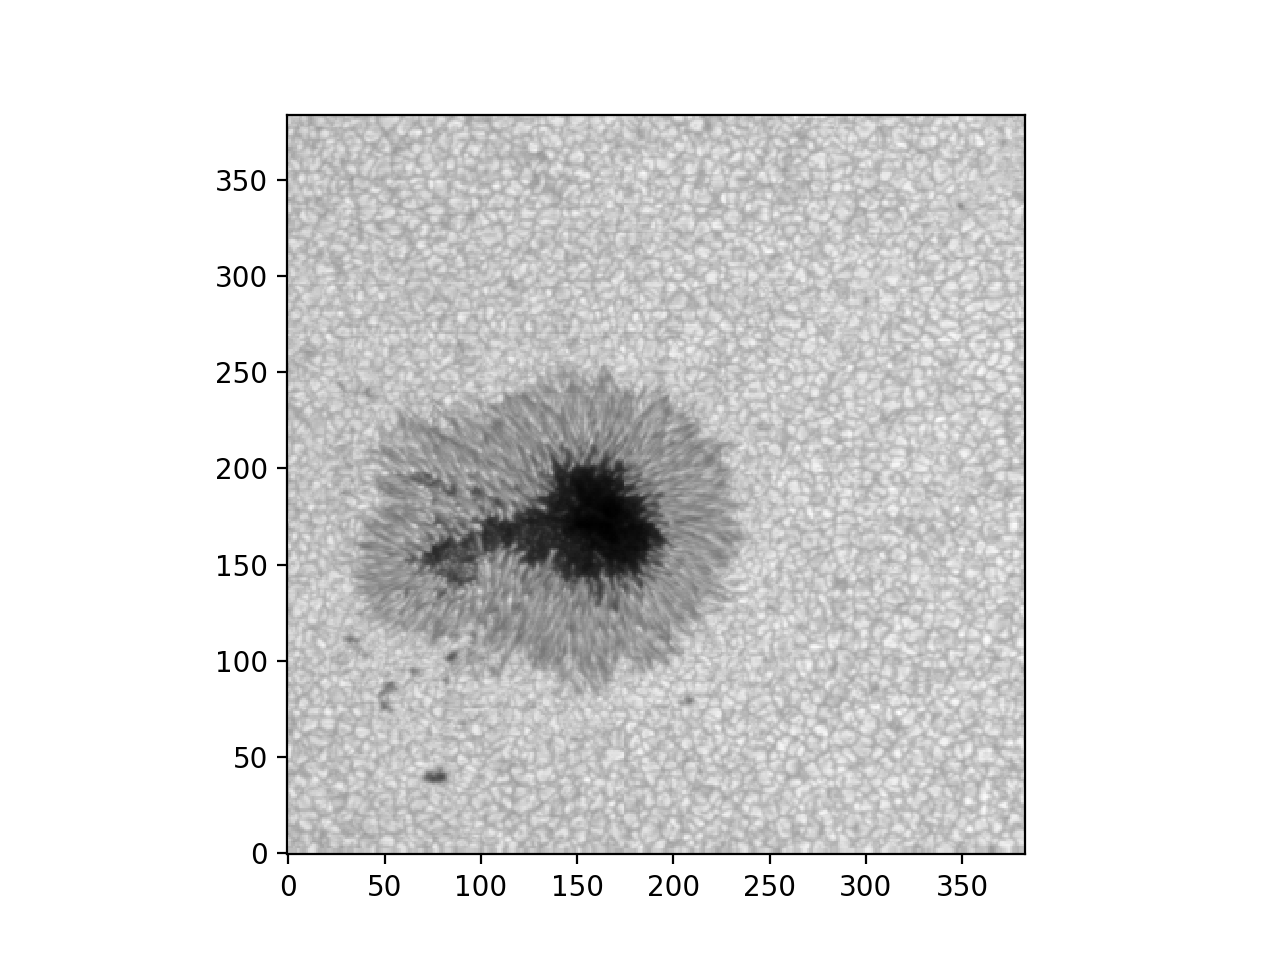

In [20]:
#See the continuum map of AR
pl.figure()
pl.imshow(maps[0,0,:,:],cmap='gray',origin='lower')
pl.show()

<IPython.core.display.Javascript object>


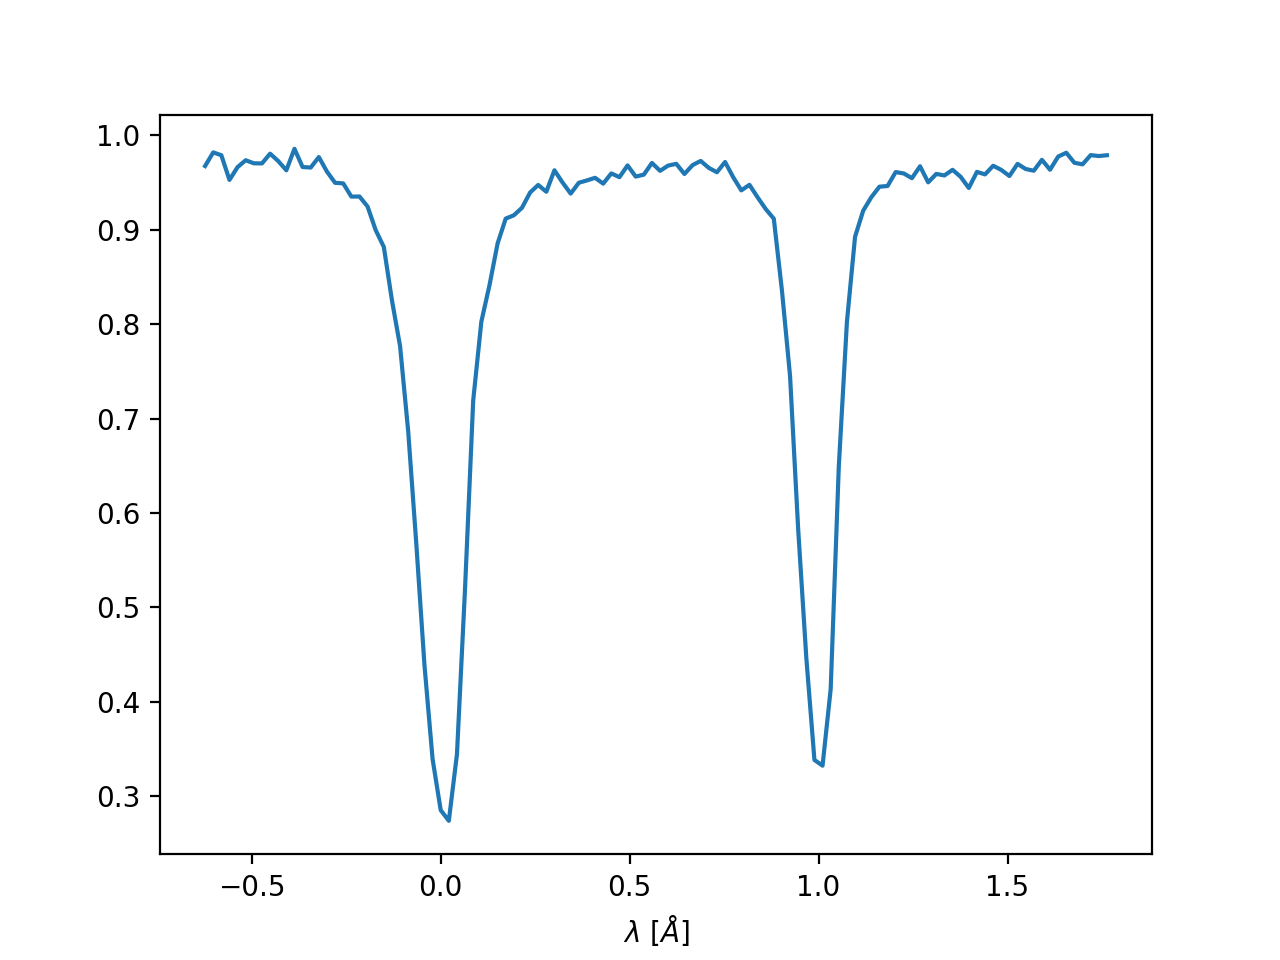

In [21]:
#Set wavelength axis
#wavelength positions# 112, spectral sampling = 21.5 mA
#
wav = (np.linspace(0,111,lmb)-29)*0.0215

#Normalized w.r.t quite-sun
ic = np.mean(maps[0,0,0:20,300:])
maps = maps/ic

#plot a quite-sun pixel profile
aa = maps[:,:,10,10]

pl.figure()
pl.plot(wav[:],aa[0,:])
pl.xlabel('$\lambda$ [$\AA$]')
pl.show()

<IPython.core.display.Javascript object>


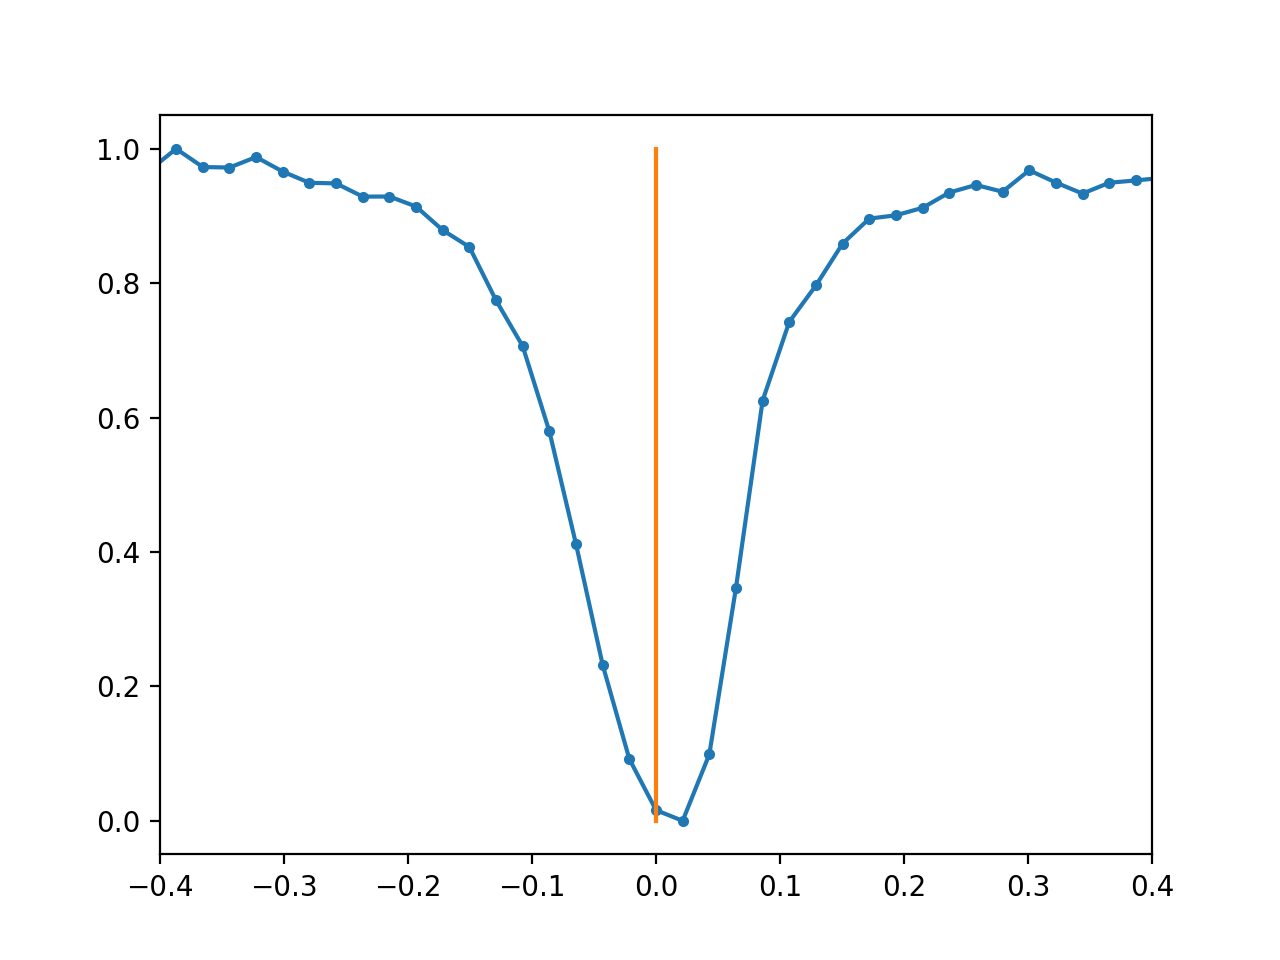

In [22]:
#intensity profile ranging from 0 (core) to 1 (continuum) [0-100%]
si = aa[0,:]
line = si - np.min(si)
line = line/max(line)

pl.figure()
pl.plot(wav,line,'.-')
pl.xlim(-0.4, 0.4)
pl.plot([0,0],[0,1])
pl.show()

<IPython.core.display.Javascript object>


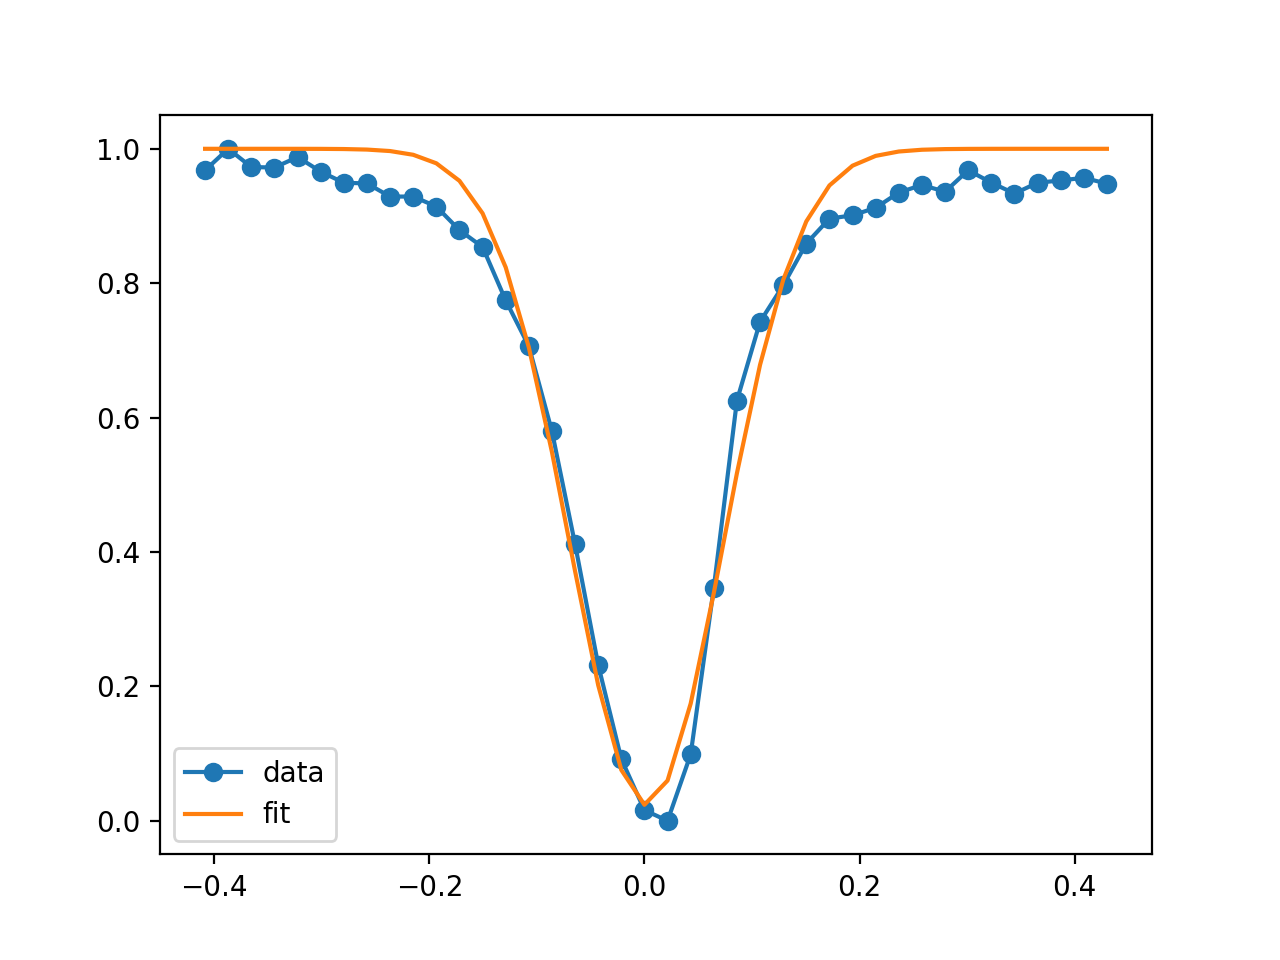

In [24]:
#fit line profile with Gaussian function
#######
n = len(x)                          #the number of data
mean = sum(x*y)/n                   
sigma = sum(y*(x-mean)**2)/n  
popt,pcov = curve_fit(gauss,x,y,p0=[1,0.0,0.1])

pl.figure()
pl.plot(x,y,'o-',label='data')
pl.plot(x,gauss(x,*popt),label='fit')
pl.legend()
pl.show()

In [25]:
fb = interp1d(y[0:20],x[0:20])
fr = interp1d(y[20:],x[20:])
pnts = [0.1,0.2,0.3,0.4,0.6,0.7,0.8]

#pnts = [0.1,0.2,0.3,0.4,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
pnts = np.linspace(0.1,0.9,15)
lb = fb(pnts)
lr = fr(pnts)
bcen = (lr+lb)/2

print(bcen)

[ 0.01018193  0.00827131  0.0063607   0.00512022  0.00417963  0.00305339
  0.00170862  0.00025448 -0.00119967 -0.00337538 -0.00356911 -0.00479776
 -0.00371049 -0.00129156  0.00204223]


<IPython.core.display.Javascript object>


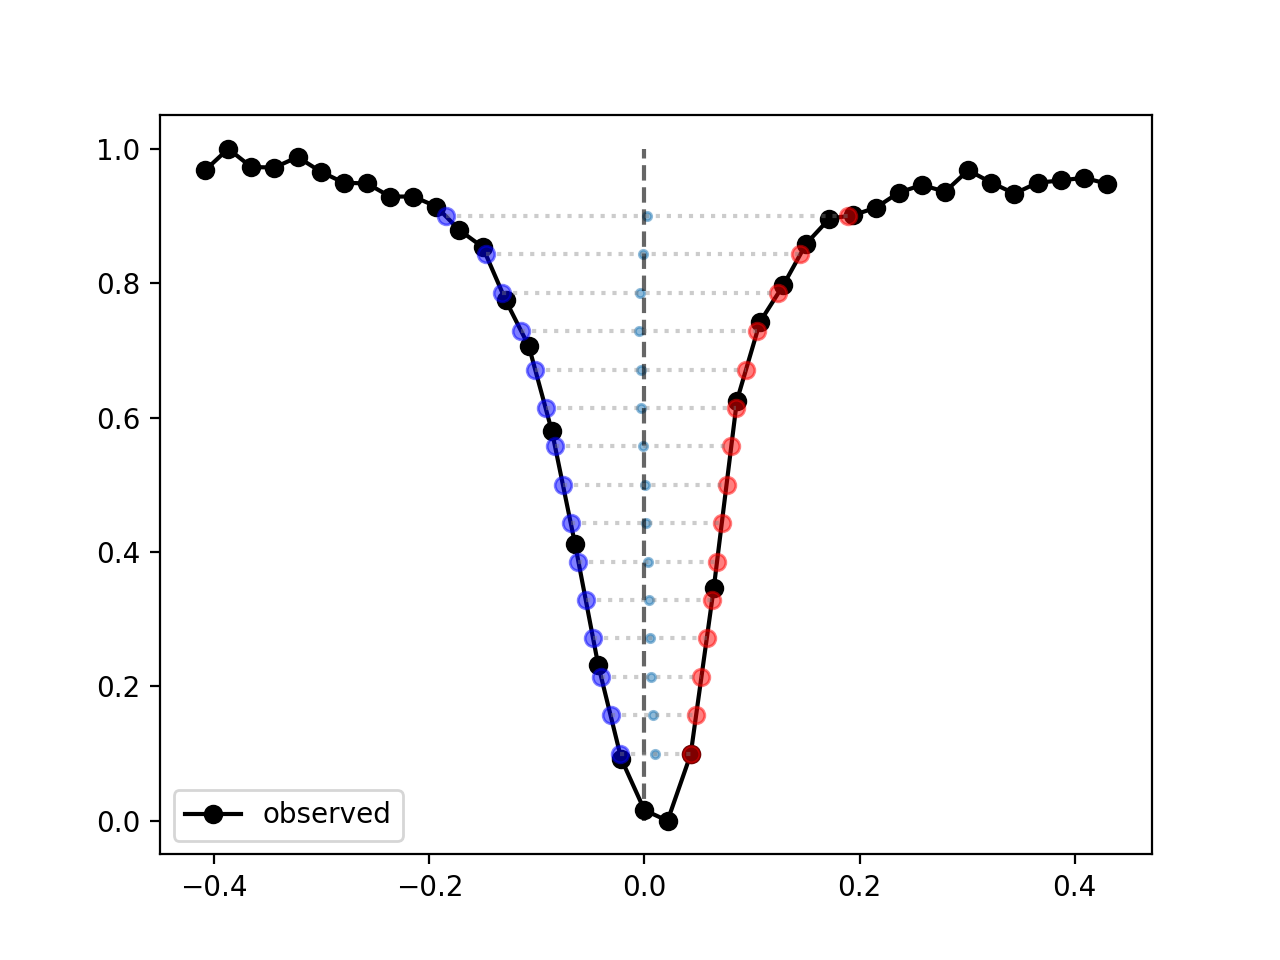

In [47]:
pl.figure()
pl.plot(x,y,'o-',color='k',label='observed')
pl.plot(fb(pnts),pnts,'bo',fr(pnts),pnts,'ro',bcen,pnts,'.',alpha=0.5)
pl.plot([0,0],[0,1],'k--',alpha=0.6)

npnts = len(pnts)
for i in range(npnts):
    pl.plot([fb(pnts[i]),fr(pnts[i])],[pnts[i],pnts[i]],':',color='gray',alpha=0.4)

pl.legend()    
pl.show()

<IPython.core.display.Javascript object>


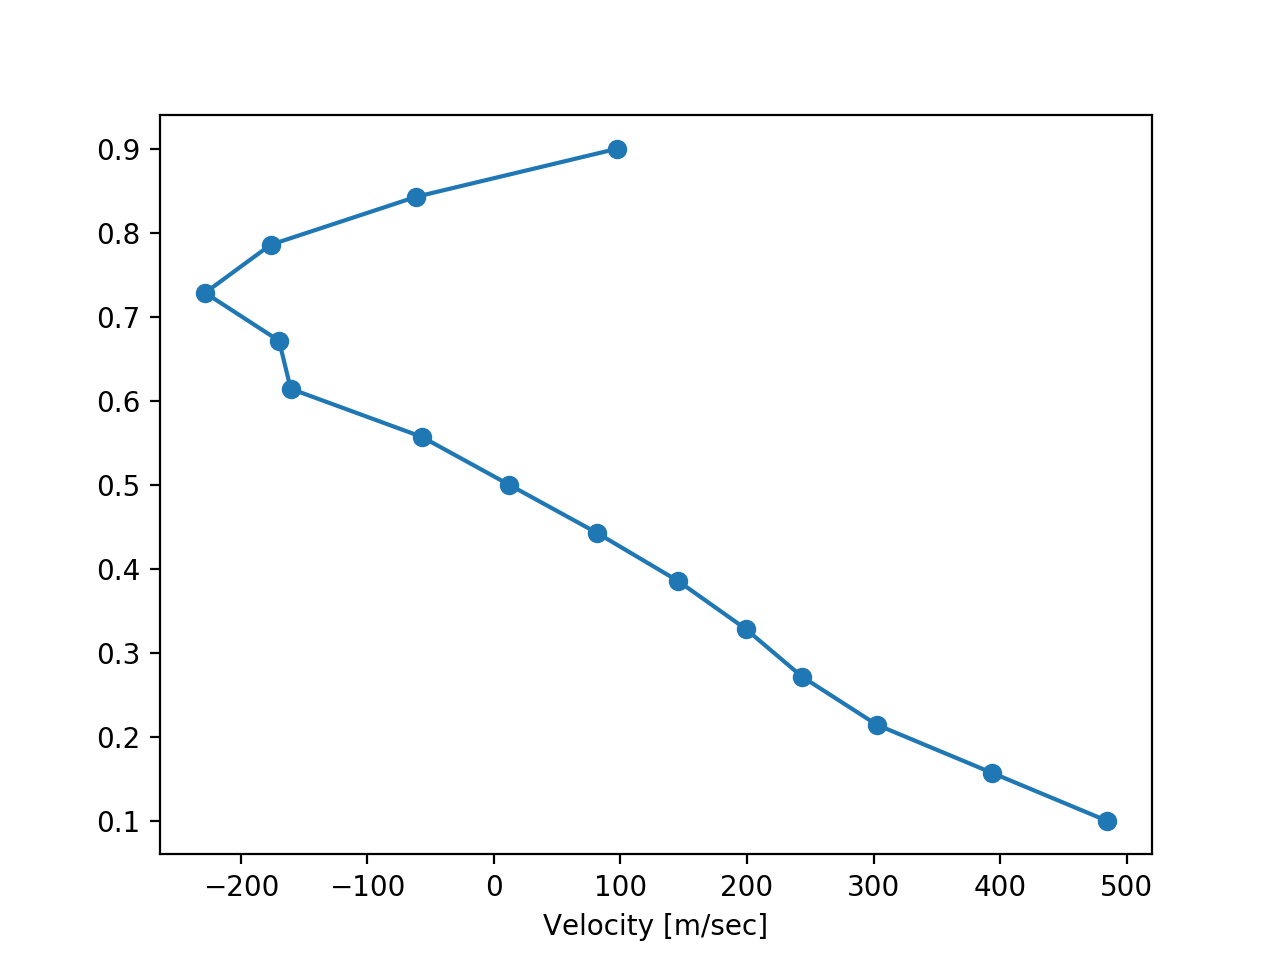

In [27]:
#inferred velocity
w0 = 6301.5
velo = (bcen/w0)*clight
pl.figure()
pl.plot(velo,pnts,'o-')
pl.xlabel('Velocity [m/sec]')
pl.show()


<IPython.core.display.Javascript object>


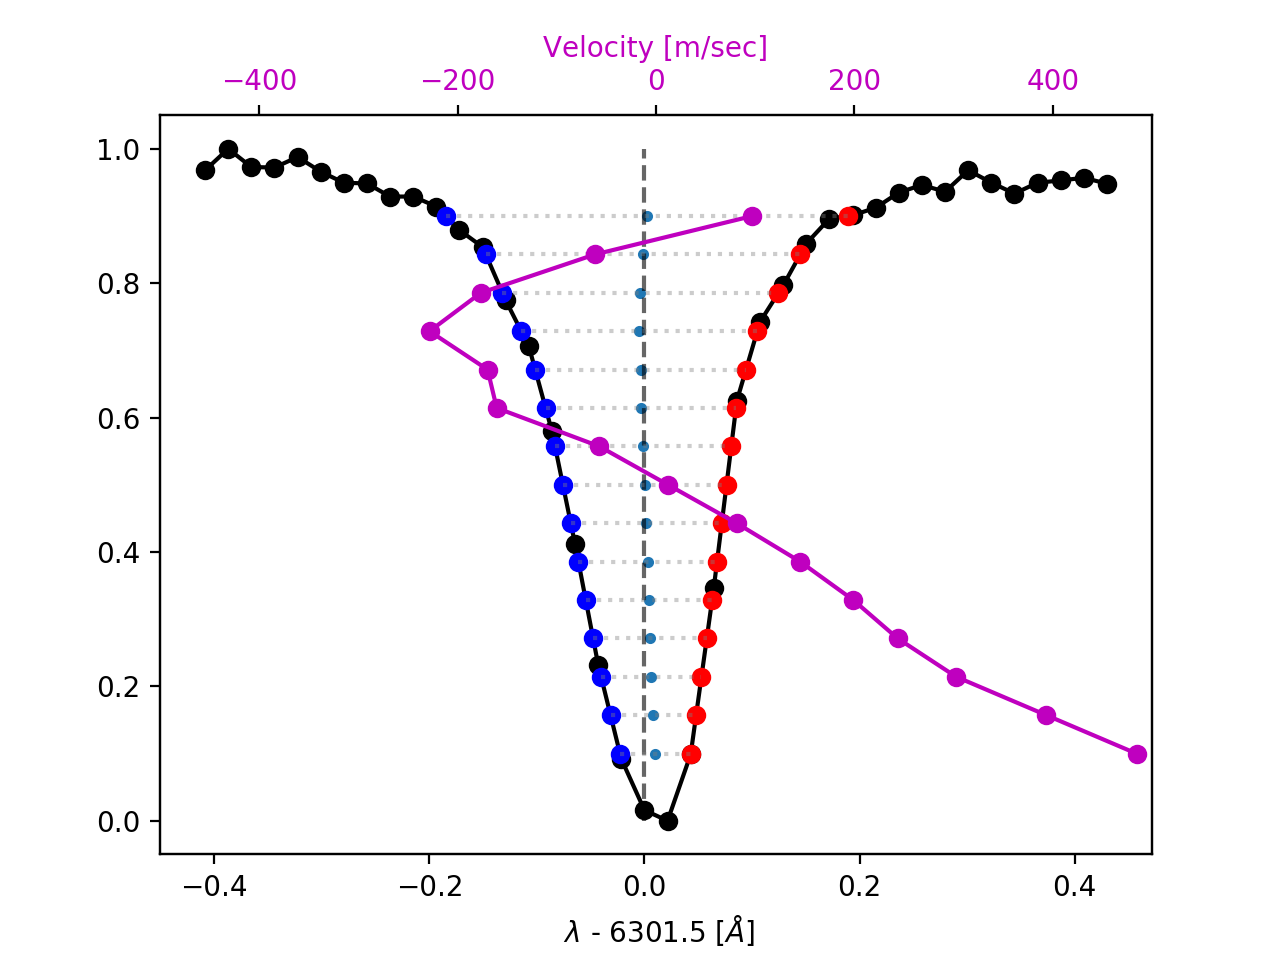

In [46]:
#plot all figures 
################
fig,ax = pl.subplots()

ay2 = ax.twiny()
ax.plot(x,y,'ko-',label='observed')
ax.plot(fb(pnts),pnts,'bo',fr(pnts),pnts,'ro',bcen,pnts,'.')
ax.plot([0,0],[0,1],'k--',alpha=0.6)
ay2.plot(velo,pnts,'o-',color='m')
ay2.set_xlim(-500,500)
ay2.set_xlabel('Velocity [m/sec]',color='m')
ay2.tick_params(axis='x', labelcolor='m')
ax.set_xlabel(' $\lambda$ - 6301.5 [$\AA$]')
npnts = len(pnts)
for i in range(npnts):
    ax.plot([fb(pnts[i]),fr(pnts[i])],[pnts[i],pnts[i]],':',color='gray',alpha=0.4)
pl.show()

In [52]:
#print mean los velocity
meand = np.mean(bcen)
velom = (meand/w0)*clight
print('LOS velocity [m/sec]',velom)

LOS velocity [m/sec] 73.67280403210552
